Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils.exhibitors import (
    load_exhibitors, 
    load_exhibitor_categories,
    preprocess_exhibitors,
    explode_exhibitors,
    merged_exhibitors_categories,
    preprocess_exhibitor_categories
)

Read all the data files related to exhibitors and categories and analyse them

In [2]:
exhibitors_df = load_exhibitors()
exhibitors_categories_df = load_exhibitor_categories()

print(exhibitors_df.head())
print(exhibitors_categories_df.head())


   exhibitorid                    Name                       MainCategories
0        90556          Turkey Travels                    52276|52280|52281
1        92462  Russian Travel Company  52273|52283|52289|52291|52298|52302
2        92491   Indian Travel Company                    52273|52274|52281
3        92492            Asia Tourism              52272|52276|52352|52358
4        92493     SriLanka Adventures                    52296|52327|52352
   categoryId                        categoryName
0       52271           1. Accomodation providers
1       52272       1.1 Hotel / Hotel chain / Inn
2       52273  1.2 Apartments / Residential hotel
3       52274                  1.3 Hostel / Motel
4       52275                  1.4 Boarding house


Check if there are any null values

In [3]:
exhibitors_df_null = exhibitors_df[exhibitors_df.isnull().any(axis=1)]          
print(exhibitors_df_null)

exhibitors_categories_df_null = exhibitors_categories_df[exhibitors_categories_df.isnull().any(axis=1)]          
print(exhibitors_categories_df_null)

Empty DataFrame
Columns: [exhibitorid, Name, MainCategories]
Index: []
Empty DataFrame
Columns: [categoryId, categoryName]
Index: []


Lets see the number of exhibitors and exhibitors_categories in the source files


In [4]:
print(f"Total rows in exhibitors.csv: {exhibitors_df.shape[0]}")
print(f"Total rows in exhibitors_categories.csv: {exhibitors_categories_df.shape[0]}")

Total rows in exhibitors.csv: 35
Total rows in exhibitors_categories.csv: 96


Display top 15 exhibitors based on number of categories

C:\Users\ameen\AppData\Local\Temp\ipykernel_25252\434408013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, y='categoryName', x='num_exhibitors', palette='viridis')


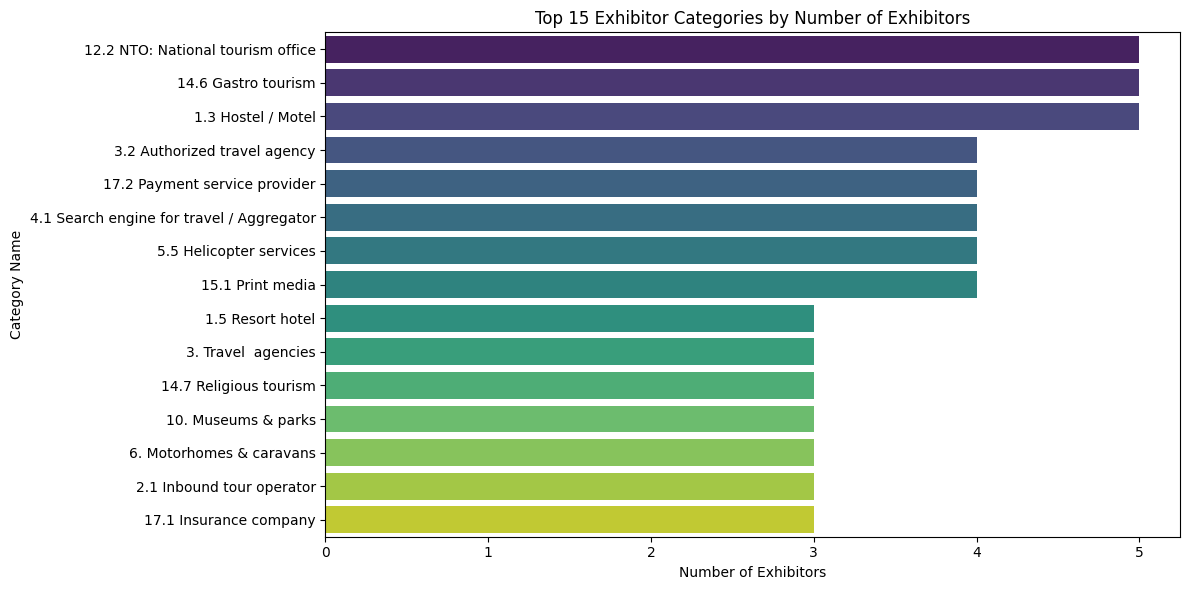

In [5]:
exhibitor_categories_df_df = preprocess_exhibitor_categories(exhibitors_categories_df)
exploded_exhibitors_df = explode_exhibitors(exhibitors_df)
merged_exhibitors_categories_df = merged_exhibitors_categories(exploded_exhibitors_df, exhibitors_categories_df)
category_counts = merged_exhibitors_categories_df['categoryName'].value_counts().reset_index()
category_counts.columns = ['categoryName', 'num_exhibitors']
top_categories = category_counts.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, y='categoryName', x='num_exhibitors', palette='viridis')
plt.title('Top 15 Exhibitor Categories by Number of Exhibitors')
plt.xlabel('Number of Exhibitors')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

 Exhibitors with Most Diverse Offerings

C:\Users\ameen\AppData\Local\Temp\ipykernel_25252\1267351609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_diverse_exhibitors, x='num_categories', y='Name', palette='mako')


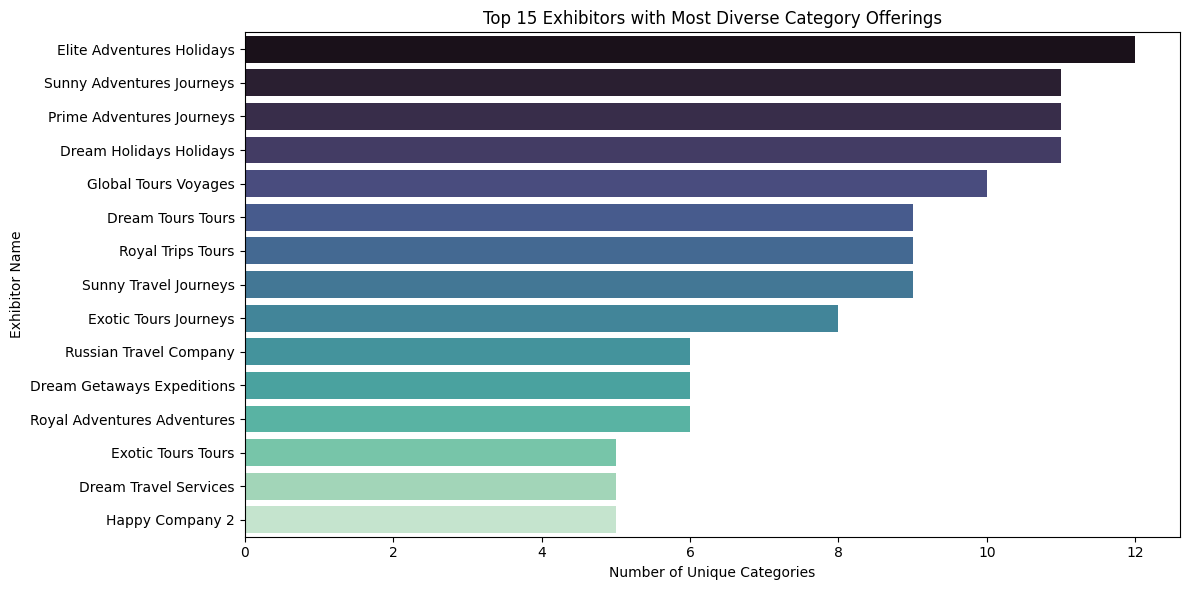

In [6]:
diverse_exhibitors = exploded_exhibitors_df.groupby(['exhibitorid', 'Name'])['categoryId'].count().reset_index()
diverse_exhibitors.columns = ['exhibitorid', 'Name', 'num_categories']
diverse_exhibitors = diverse_exhibitors.sort_values(by='num_categories', ascending=False)

top_diverse_exhibitors = diverse_exhibitors.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_diverse_exhibitors, x='num_categories', y='Name', palette='mako')
plt.title('Top 15 Exhibitors with Most Diverse Category Offerings')
plt.xlabel('Number of Unique Categories')
plt.ylabel('Exhibitor Name')
plt.tight_layout()
plt.show()
